# Wine Dataset

All wines are produced in a specific region of Portugal. The dataset includes 12 different wine attributes, one of which is Quality, determined through sensory evaluation, while the others pertain to the wines' chemical properties, such as density, acidity, and alcohol content. The chemical properties are continuous variables, and Quality is an ordinal variable, ranging from 1 (worst) to 10 (best).

## Objective

To analyze the chemical properties of red and white wines seperately using **Principal Component Analysis (PCA)** and **KMeans clustering**. The goal is to perform dimensionality reduction through PCA to identify the principal components that capture the most variance in the data, and then apply KMeans clustering to segment the wines into distinct clusters based on their chemical properties. 

This analysis aims to uncover underlying patterns and groupings in the wines, which could provide insights into the factors influencing wine quality and assist in better understanding the relationship between chemical attributes and perceived quality.

### Here's the base plan:
* **Read the red and white wine csv** and create dataframes from them.

* **Cleaning the data**: removing rows with values of zero or null in any cell and then using standard scaler to normalize the values.

* **EDA**: Analyzing box plots of each column vs quality, observing quality distribution histograms and correlation matrices for both red and white wine dataset.

* **Applying PCA** to do dimensionality reduction on both the datasets, analyzing the PCAs and then finding out the most important features.

* **Applying K-means clustering** algorithm and then analyzing and trying to understand what each cluster represent using parallel coordinates plot.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Github link: https://github.com/milanPatel001/USL-Project

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df_white = pd.read_csv('./data/winequality-white.csv', delimiter=';')
df_red = pd.read_csv('./data/winequality-red.csv', delimiter=';')

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Checking for null or zero values, dropping the quality column from both the datasets so that PCA and Clustering algorithms can be applied on the datasets. Also normalizing the values by using StandardScaler. 

In [5]:
df_red = df_red[(df_red != 0).all(axis=1)].dropna()
df_white = df_white[(df_white != 0).all(axis=1)].dropna()

X_red = df_red.drop('quality', axis=1)  # Drop target variable
X_red_scaled = StandardScaler().fit_transform(X_red)  # Standardize features
df_red_scaled = pd.DataFrame(X_red_scaled, columns=X_red.columns)


X_white = df_white.drop('quality', axis=1)
X_white_scaled = StandardScaler().fit_transform(X_white)
df_white_scaled = pd.DataFrame(X_white_scaled, columns=X_white.columns)

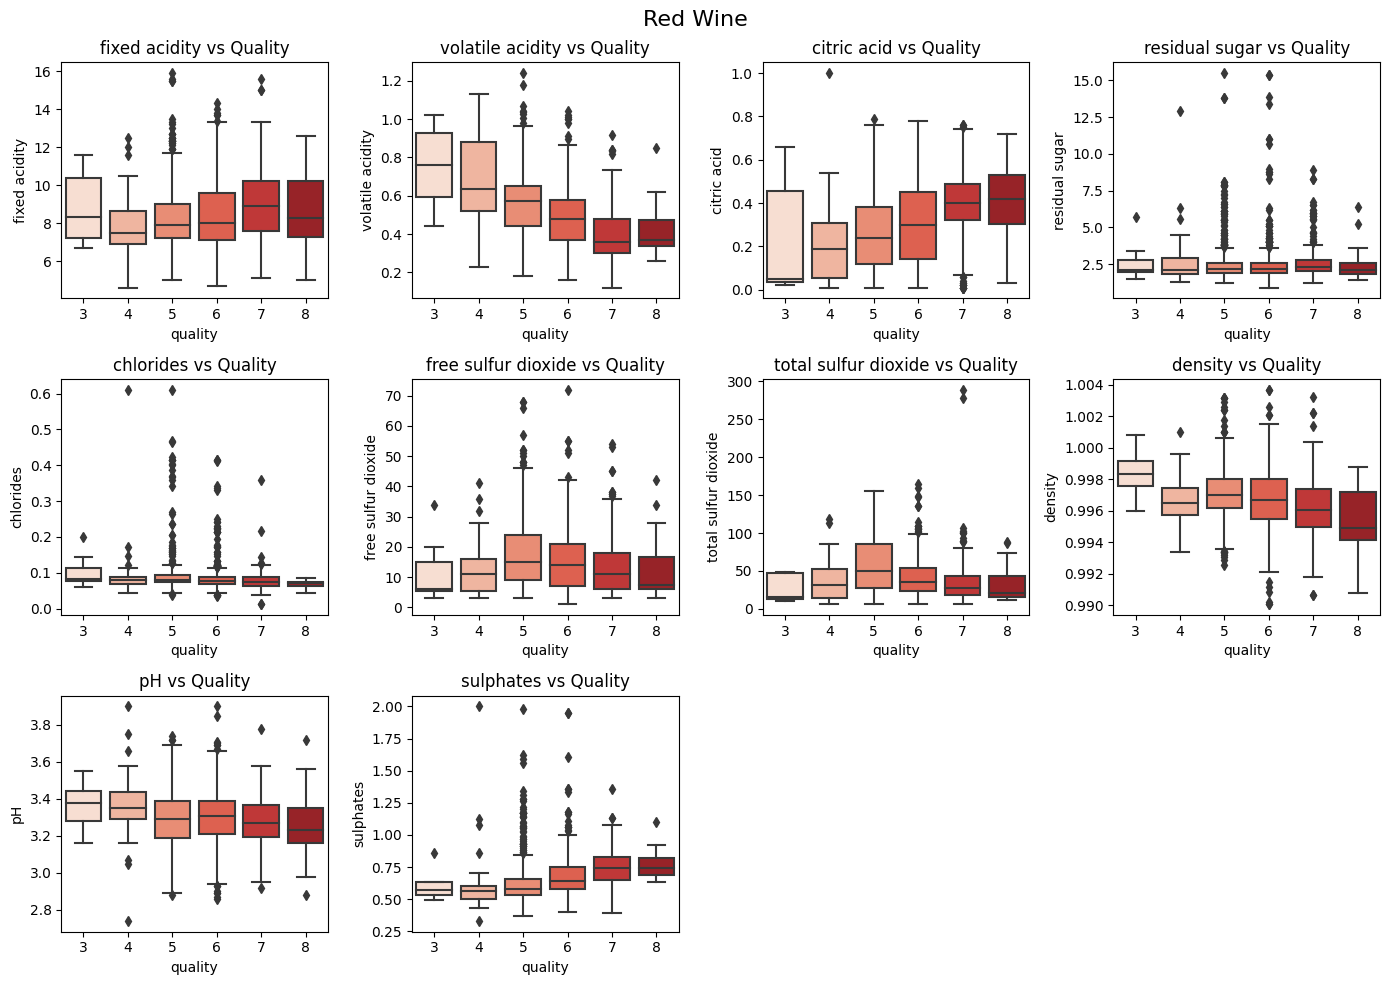

In [6]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(df_red.columns[:-2], 1):  # Exclude 'quality' column
    plt.subplot(3, 4, i)
    sns.boxplot(x='quality', y=df_red[column], data=df_red, palette='Reds')
    plt.title(f'{column} vs Quality')
  
plt.suptitle('Red Wine', fontsize=16)
plt.tight_layout()
plt.show()

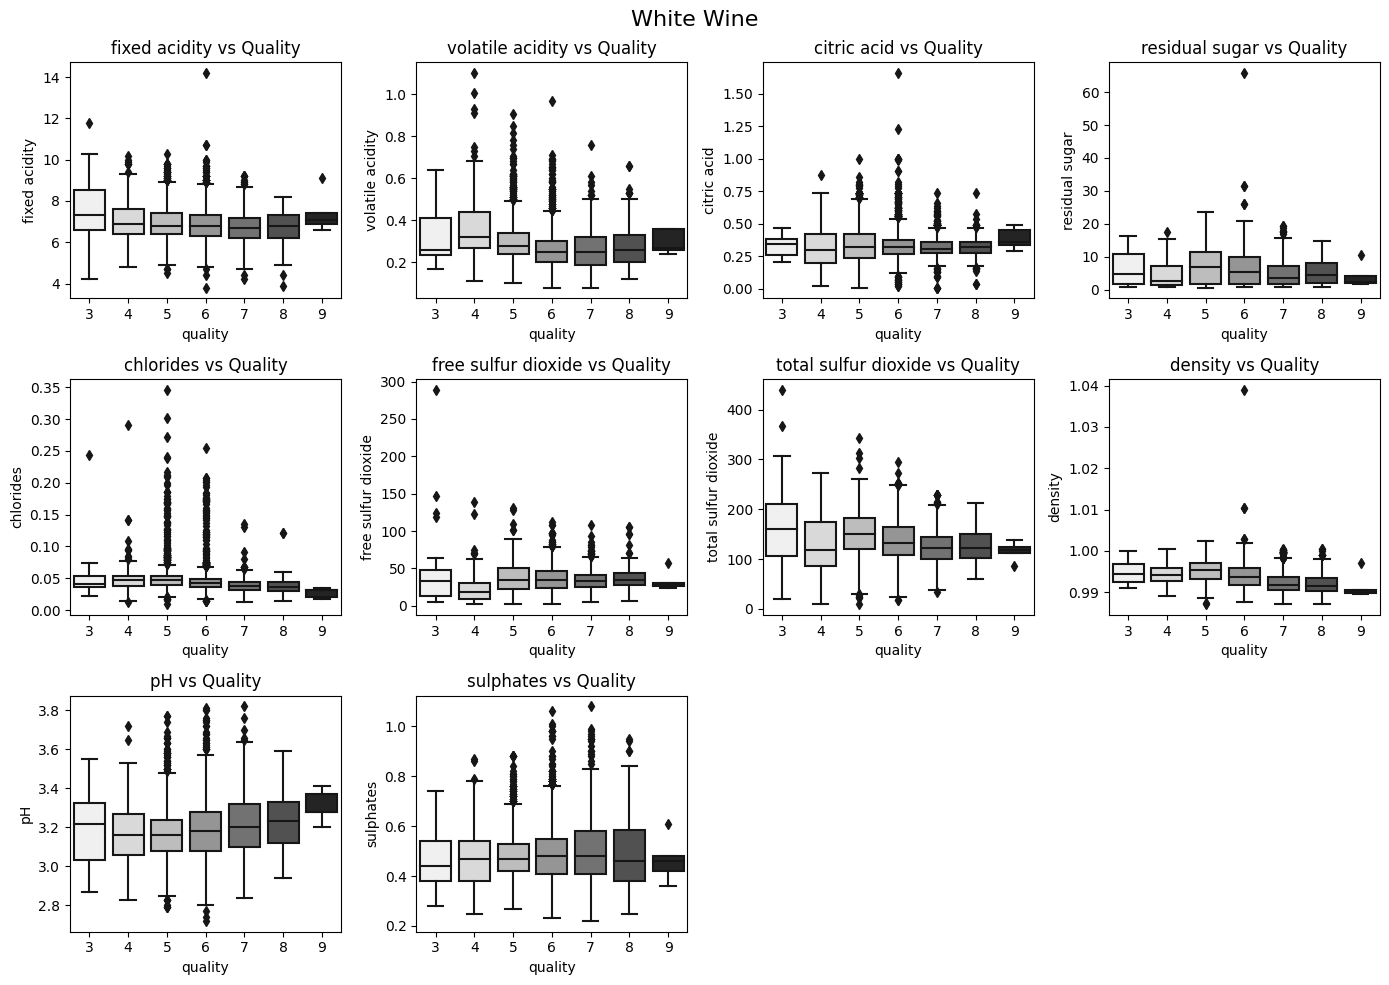

In [7]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(df_red.columns[:-2], 1):  # Exclude 'quality' column
    plt.subplot(3, 4, i)
    sns.boxplot(x='quality', y=df_white[column], data=df_white, palette='Greys')
    plt.title(f'{column} vs Quality')
  
plt.suptitle('White Wine', fontsize=16)
plt.tight_layout()
plt.show()

### Red Wine Box plot observation:
**Volatile Acidity**: Decreases with higher quality, indicating that lower levels are associated with better taste.

**Fixed Acidity, Citric Acid, and Sulphates**: Slightly increase with quality, suggesting that these components may contribute to a more desirable wine profile.

**Residual Sugar, Chlorides, and pH**: Show little variation across different quality levels.

**Free and Total Sulfur Dioxide**: Increase with quality, likely related to better preservation in higher quality wines.

**Density**: Slightly decreases with quality, possibly due to lower sugar content.

### White Wine Box plot observation:
**Citric Acid**: Increases with higher quality, contributing to a fresher taste in better wines.

**Residual Sugar**: Higher quality wines tend to have slightly more, which may add to smoothness.

**Sulphates**: Increase with quality, similar to red wine, indicating better preservation.

**Volatile Acidity**, **Fixed Acidity, and Density**: Show less pronounced trends compared to red wine.

**Chlorides, Free and Total Sulfur Dioxide, and pH**: Display minor changes across quality levels.

### Key Differences between Red and White Wines:
* Volatile Acidity has a more significant impact on red wine quality.
* Citric Acid and Residual Sugar play a larger role in determining the quality of white wines.
* Sulphates increase with quality in both, but more noticeably in red wines.

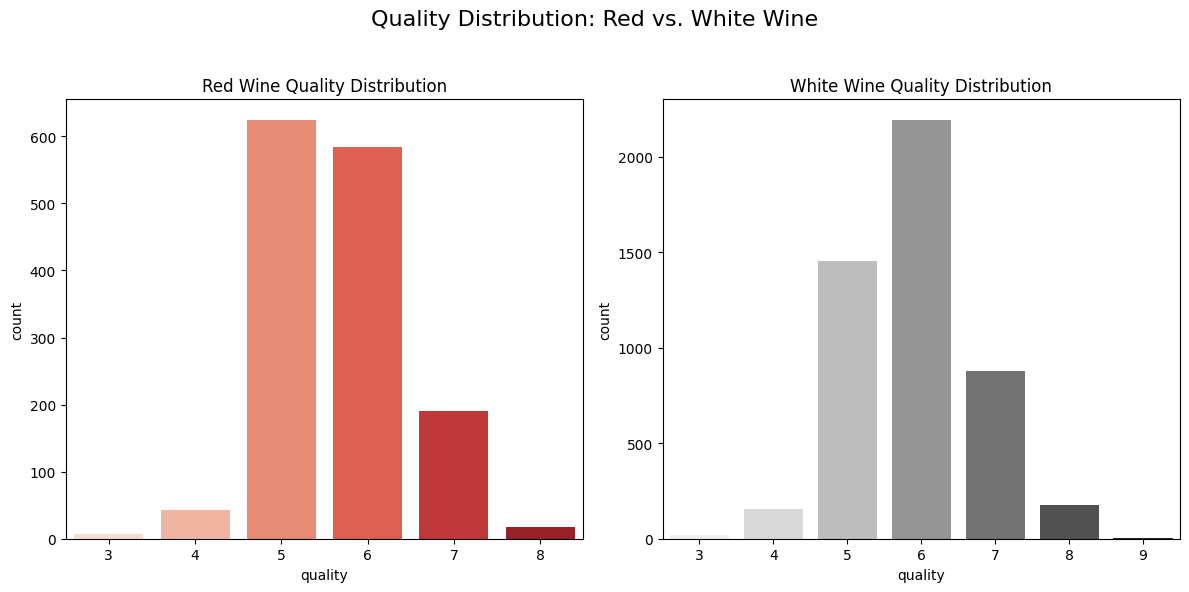

In [9]:
plt.figure(figsize=(12, 6))

# Red Wine Quality Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='quality', data=df_red, palette='Reds')
plt.title('Red Wine Quality Distribution')

# White Wine Quality Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=df_white, palette='Greys')
plt.title('White Wine Quality Distribution')

plt.suptitle('Quality Distribution: Red vs. White Wine', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit suptitle
plt.show()

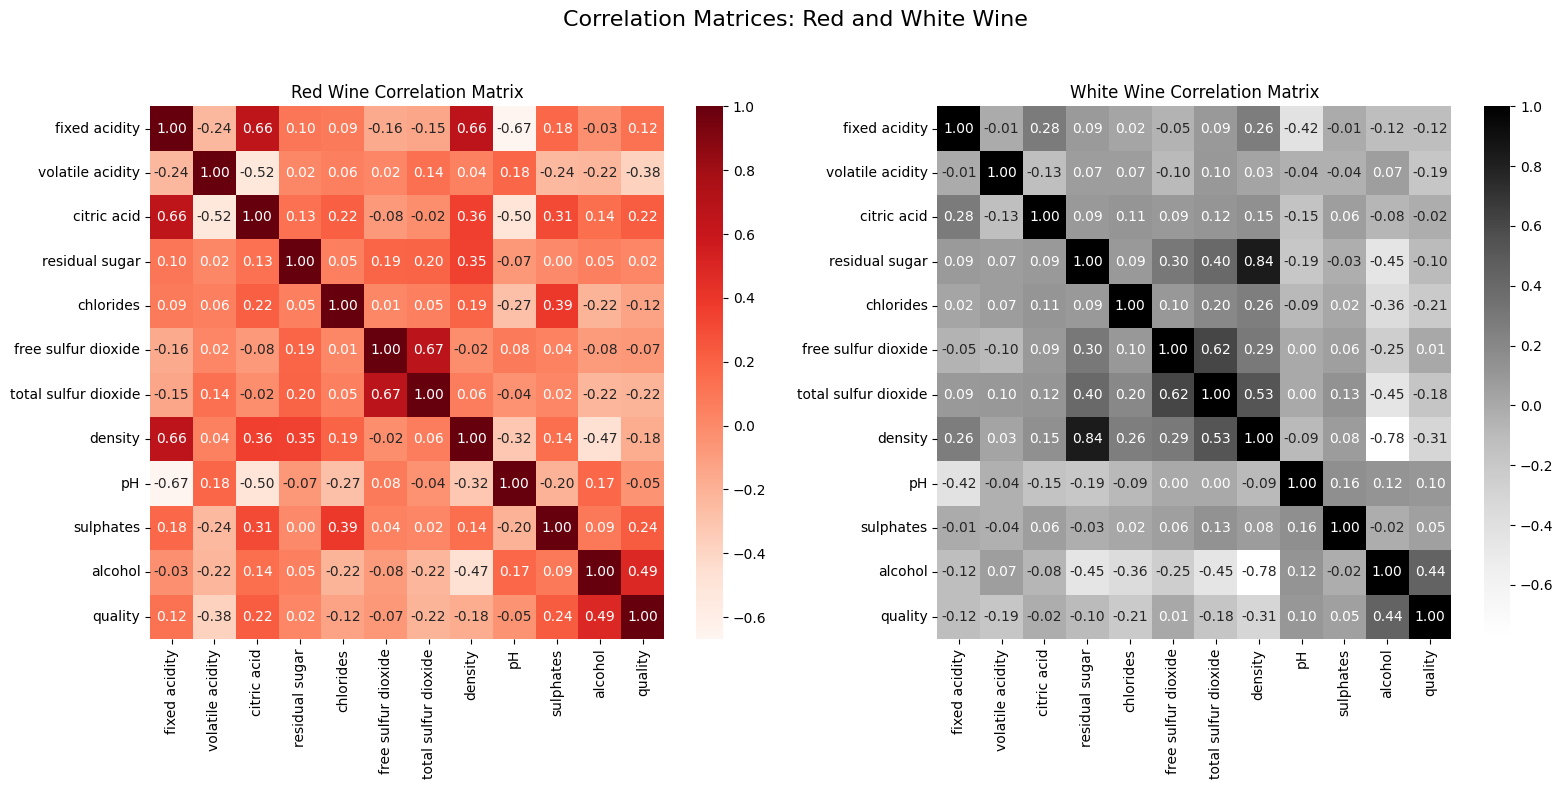

In [10]:
plt.figure(figsize=(16, 8))

# Red Wine Correlation Matrix
plt.subplot(1, 2, 1)
sns.heatmap(df_red.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title('Red Wine Correlation Matrix')

# White Wine Correlation Matrix
plt.subplot(1, 2, 2)
sns.heatmap(df_white.corr(), annot=True, cmap='Greys', fmt=".2f")
plt.title('White Wine Correlation Matrix')

plt.suptitle('Correlation Matrices: Red and White Wine', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit suptitle
plt.show()

### Key Differences in Correlation:
* The correlation between **citric acid** and **fixed acidity** is notably stronger in white wine (0.67) than in red wine (0.29). This suggests that in white wines, citric acid contributes more significantly to the overall acidity compared to red wines
* **Density**: The relationship between density and residual sugar is stronger in red wines (0.84) than in white wines (0.36).
* **pH**: The negative correlation between pH and fixed acidity is more pronounced in white wines (-0.68) compared to red wines (-0.43).
* **Sulphates**: The positive correlation with quality is slightly stronger in red wines (0.31) compared to white wines (0.25).

# PCA

#### Let's try to do PCA and do some dimensionality reduction on both the datasets. But first let's try to find the number of components required to achieve 95% of cumulative explained variance for both the datasets.

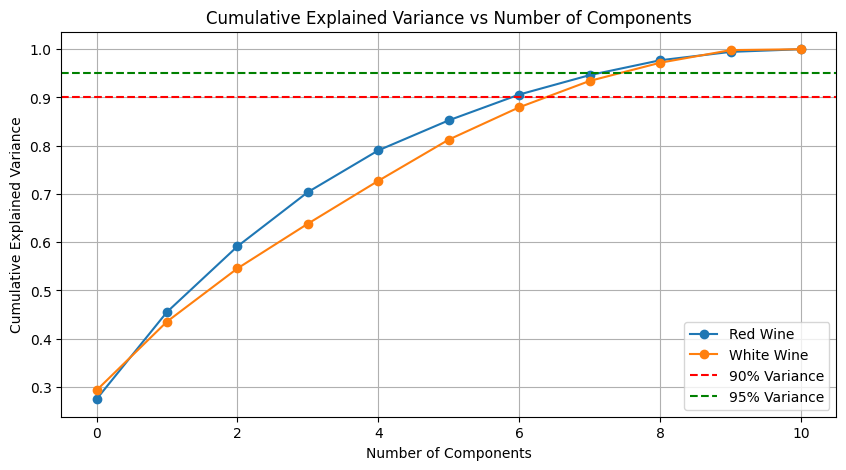

In [8]:
pca_red = PCA().fit(X_red_scaled)

# Separate PCA for white wine
pca_white = PCA().fit(X_white_scaled)

# Plot Cumulative Explained Variance for Red Wine
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_red.explained_variance_ratio_), marker='o', label='Red Wine')
plt.plot(np.cumsum(pca_white.explained_variance_ratio_), marker='o', label='White Wine')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
pca_loadings_red = pd.DataFrame(pca_red.components_, columns=X_red.columns, index=[f'PC{i+1}' for i in range(pca_red.n_components_)])
pca_loadings_white = pd.DataFrame(pca_white.components_, columns=X_white.columns, index=[f'PC{i+1}' for i in range(pca_white.n_components_)])

print("PCA Loadings for Red Wine:\n")
print(pca_loadings_red)

print("\nPCA Loadings for White Wine:\n")
print(pca_loadings_white)

PCA Loadings for Red Wine:

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1        0.498476         -0.227629     0.467860        0.130027   0.220469   
PC2       -0.071764          0.292352    -0.134072        0.268861   0.170094   
PC3       -0.129831         -0.438301     0.239915        0.138200  -0.043354   
PC4       -0.238864          0.075324    -0.085154       -0.408141   0.644089   
PC5       -0.117867          0.235888    -0.076233        0.704244   0.277291   
PC6        0.145201          0.513065     0.015448        0.017570   0.179984   
PC7       -0.300809         -0.425313     0.123304        0.296056   0.423382   
PC8       -0.155068         -0.151817    -0.412236        0.310773  -0.369205   
PC9       -0.211680          0.117631     0.386445        0.012395  -0.148089   
PC10      -0.250581          0.357684     0.595058        0.098909  -0.236031   
PC11       0.644478          0.018449    -0.060792        0.186264   0.056932   


In [12]:
pca_components = pd.DataFrame(pca_red.components_, columns=X_red.columns)

# Access the explained variance
explained_variance = pca_red.explained_variance_ratio_

# Identify the most contributing features for each component
# We'll take the absolute value to focus on magnitude
important_features = pca_components.abs().idxmax(axis=1)

# Combine the results into a DataFrame for easier interpretation
pca_summary = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Most Important Feature': important_features
})
print('\t\t\tRed Wine summary\n')
print(pca_summary)

			Red Wine summary

    Principal Component  Explained Variance Most Important Feature
0                     1            0.274389          fixed acidity
1                     2            0.180791   total sulfur dioxide
2                     3            0.136087                alcohol
3                     4            0.112538              chlorides
4                     5            0.086494         residual sugar
5                     6            0.062278                     pH
6                     7            0.053462              sulphates
7                     8            0.040244                     pH
8                     9            0.030815    free sulfur dioxide
9                    10            0.017388            citric acid
10                   11            0.005516          fixed acidity


In [13]:
pca_components = pd.DataFrame(pca_white.components_, columns=X_white.columns)

explained_variance = pca_white.explained_variance_ratio_

important_features = pca_components.abs().idxmax(axis=1)

pca_summary = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Most Important Feature': important_features
})

print('\t\t\tWhite Wine summary\n')
print(pca_summary)

			White Wine summary

    Principal Component  Explained Variance Most Important Feature
0                     1            0.292789                density
1                     2            0.142455          fixed acidity
2                     3            0.110285       volatile acidity
3                     4            0.092747              chlorides
4                     5            0.088916       volatile acidity
5                     6            0.085409              sulphates
6                     7            0.067027            citric acid
7                     8            0.054655          fixed acidity
8                     9            0.037690                alcohol
9                    10            0.026145   total sulfur dioxide
10                   11            0.001881                density


### Overlap and Differences:

Both wine types share some common features like 'Fixed Acidity' and 'Volatile Acidity', but the importance of other features like 'Density' and 'Total Sulfur Dioxide' differ between red and white wines.
This reflects differences in the chemical composition that may affect the characteristics and quality of each type of wine differently.

In [14]:
# Retain only the first 7 components (as per the variance graph above)

X_red_pca = pca_red.transform(X_red_scaled)[:, :7]  
X_white_pca = pca_white.transform(X_white_scaled)[:, :7]

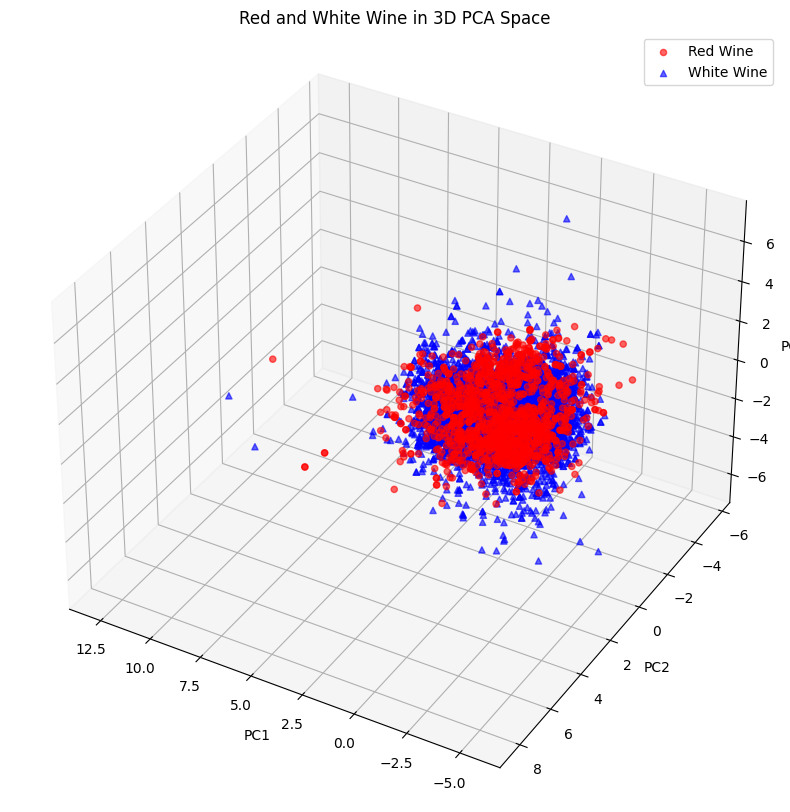

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Retain only the first three components
X_pca_red_3d = X_red_pca[:, :3]
X_pca_white_3d = X_white_pca[:, :3]

# Create a 3D scatter plot for both red and white wine
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot red wine data
ax.scatter(X_pca_red_3d[:, 0], X_pca_red_3d[:, 1], X_pca_red_3d[:, 2], 
           color='red', label='Red Wine', alpha=0.6, marker='o')

# Plot white wine data
ax.scatter(X_pca_white_3d[:, 0], X_pca_white_3d[:, 1], X_pca_white_3d[:, 2], 
           color='blue', label='White Wine', alpha=0.6, marker='^')

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Red and White Wine in 3D PCA Space')

ax.view_init(elev=35, azim=120) 

# Add a legend
ax.legend(loc='best')

# Show the plot
plt.show()

The center of the plot appears denser, indicating that most wines share similar characteristics, while the outliers represent more unique samples. White wines appear to have slightly more variability along PC2 and PC3, while red wines show more spread along PC1. This suggests that the primary factors distinguishing red wines might be more aligned with PC1, while white wines have more variation in the characteristics represented by PC2 and PC3.

# K-Means Clustering

#### Now let's try to do k-means clustering on the PCA reduced datasets. First, let's find the appropriate number of clusters for the kmeans algorithm using wcss and elbow method.

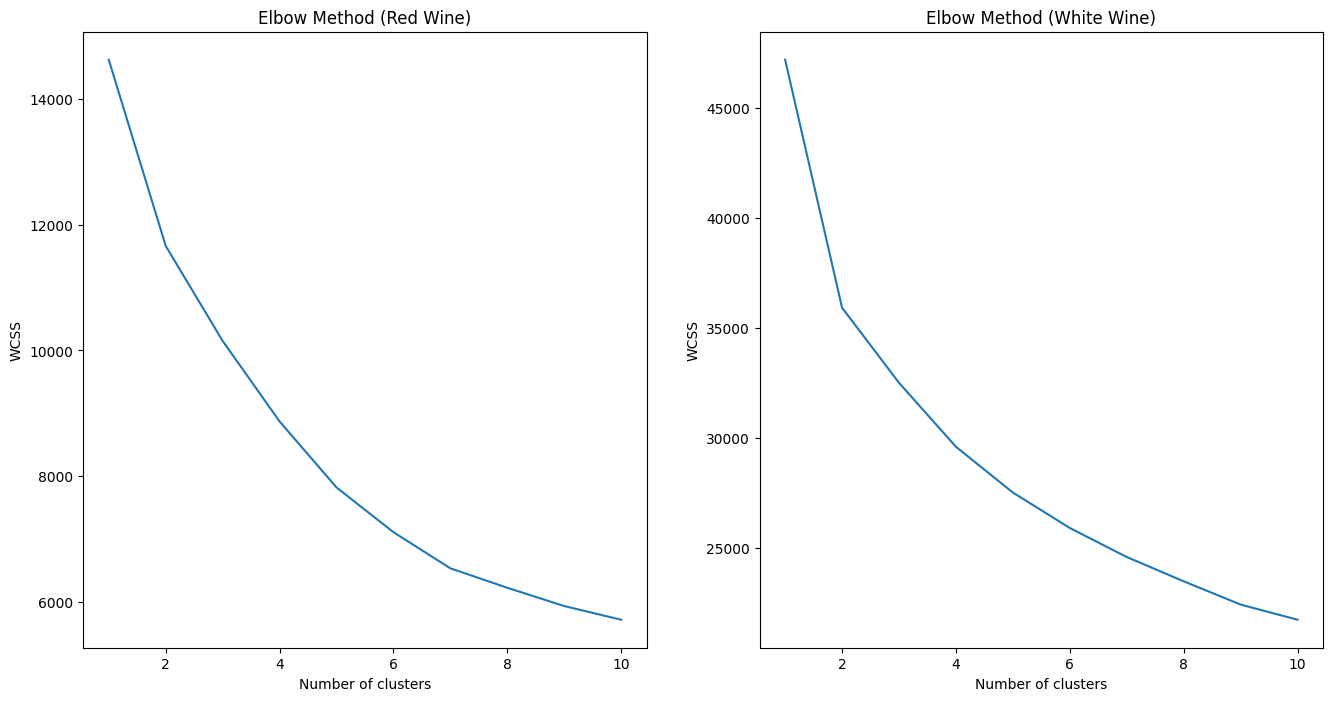

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss_red = []
wcss_white = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    
    kmeans.fit(X_red_pca) 
    wcss_red.append(kmeans.inertia_)
    
    kmeans.fit(X_white_pca)
    wcss_white.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_red)
plt.title('Elbow Method (Red Wine)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss_white)
plt.title('Elbow Method (White Wine)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

#### In this graph, there's a sharp decrease in WCSS from 1 to 2 clusters, and another noticeable drop from 2 to 3 clusters. The curve starts to level off after 3 or 4 clusters, with diminishing returns for additional clusters. Therefore, the elbow point, appears to be 2 for white and either 2 or 3 clusters for red wine. Let's choose 3 clusters for kmeans algorithm for both the dataset.

Red Wine Clustering:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 size: 627
Cluster 1 size: 360


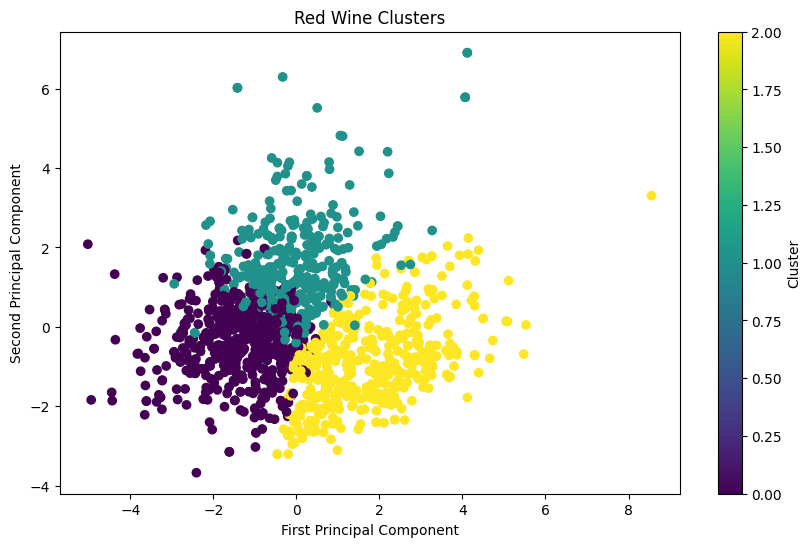


White Wine Clustering:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 size: 1482
Cluster 1 size: 1600


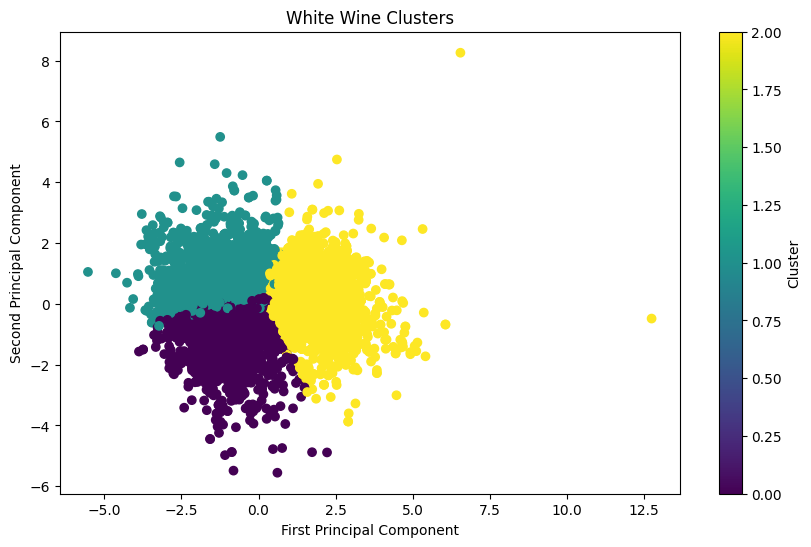

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to perform K-means and visualize results
def kmeans_and_visualize(X, title):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Visualize the results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'{title} Clusters')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')

    # Print cluster sizes
    for i in range(2):
        print(f"Cluster {i} size: {sum(cluster_labels == i)}")
    
    plt.show()

    return kmeans

# K-means on red wine data
print("Red Wine Clustering:")
kmeans_red = kmeans_and_visualize(X_red_pca, "Red Wine")

print("\nWhite Wine Clustering:")
kmeans_white = kmeans_and_visualize(X_white_pca, "White Wine")

### All the three clusters for each wine set is quite distinct. But we don't exactly know what each cluster represents. For that, let's try to plot parallel coordinates in order to understand these clusters in depth.

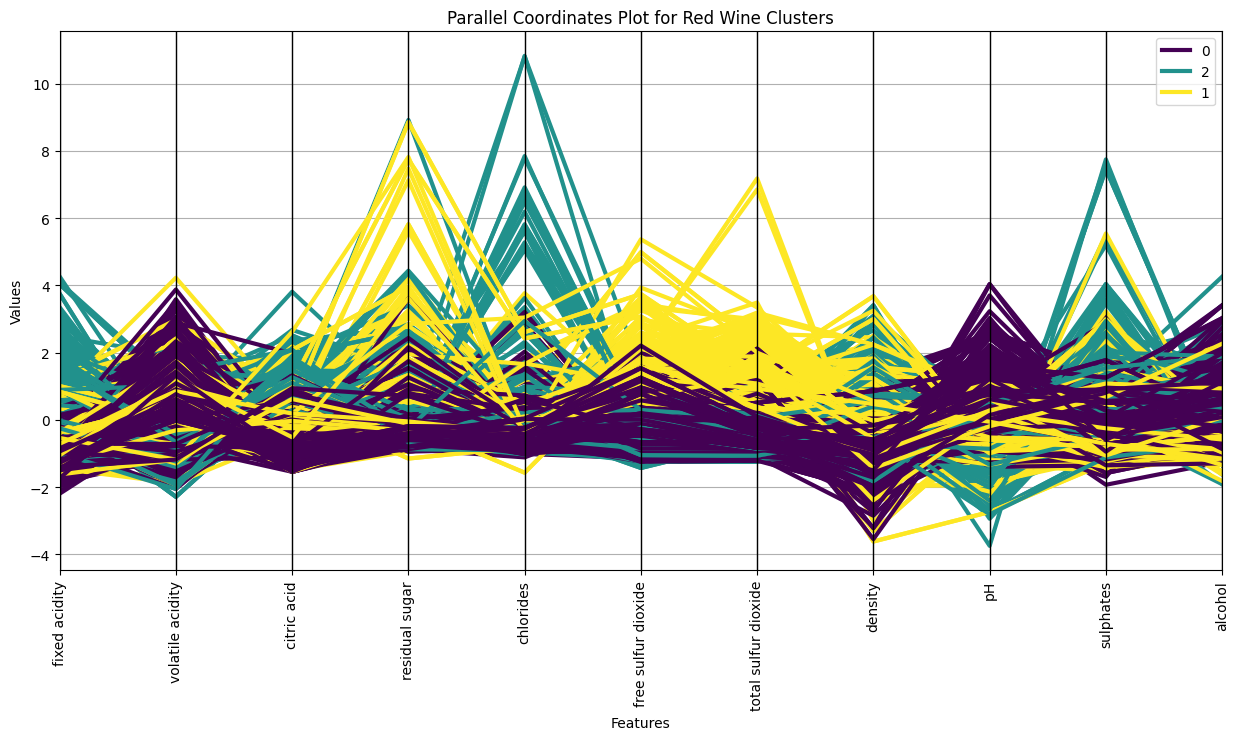

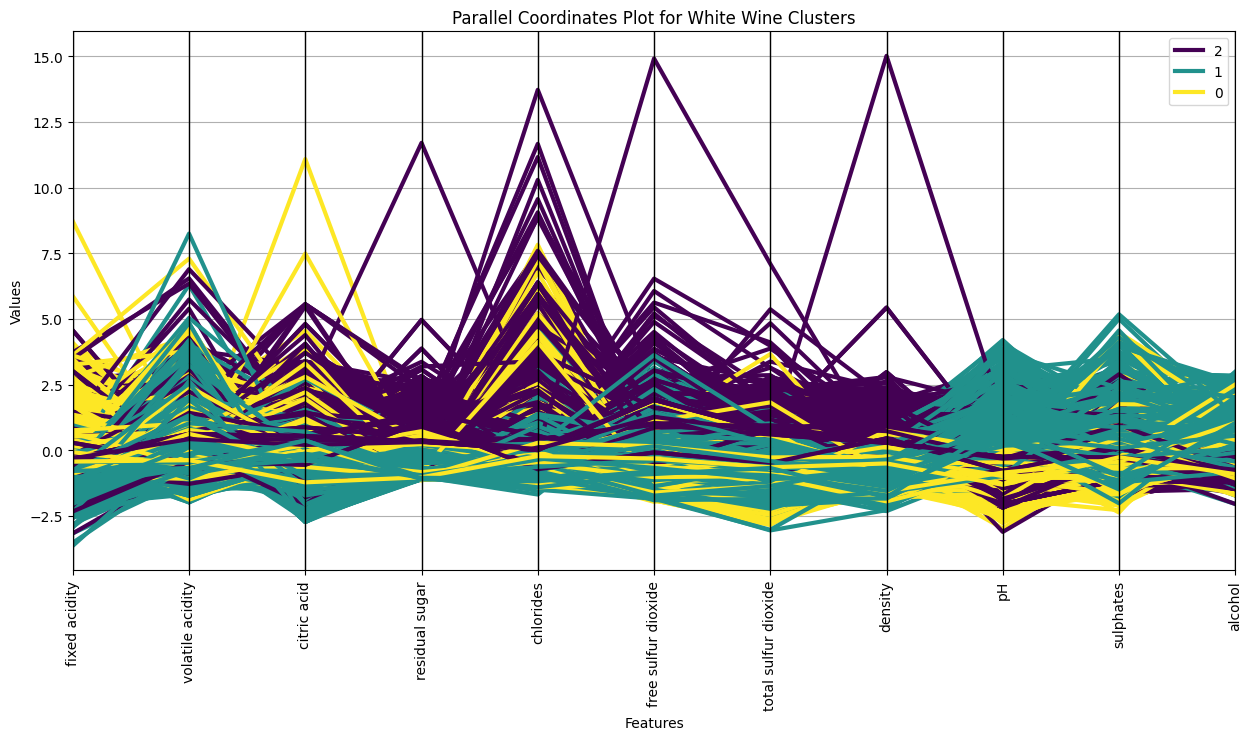

In [18]:
from pandas.plotting import parallel_coordinates


df_red_scaled['cluster'] = kmeans_red.labels_
df_white_scaled['cluster'] = kmeans_white.labels_


# Parallel Coordinates for Red Wine Clusters
plt.figure(figsize=(15, 7))
parallel_coordinates(df_red_scaled, class_column='cluster', colormap='viridis', linewidth=3)
plt.title('Parallel Coordinates Plot for Red Wine Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Parallel Coordinates for White Wine Clusters
plt.figure(figsize=(15, 7))
parallel_coordinates(df_white_scaled, class_column='cluster', colormap='viridis', linewidth=3)
plt.title('Parallel Coordinates Plot for White Wine Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### White Wine Clusters:

* Cluster 2 (purple) shows high peaks in chlorides, free sulfur dioxide, and total sulfur dioxide.
* Cluster 1 (teal) has moderate values across most features, with a notable peak in pH.
* Cluster 0 (yellow) shows higher values in fixed acidity and citric acid.

The most significant differences between clusters appear in chlorides, sulfur dioxide levels, and acidity measures.

### Red Wine Clusters:

* Cluster 2 (teal) shows very high peaks in chlorides and alcohol content.
* Cluster 1 (yellow) has higher values in residual sugar and total sulfur dioxide.
* Cluster 0 (purple) shows moderate values across most features, with slightly higher density.

The most significant differences between clusters are seen in chlorides, alcohol content, and residual sugar.

Both wines have clusters that show significant variations in key features like Chlorides, Citric Acid, and Residual Sugar.
While both white and red wines share some similar patterns (e.g., variability in Volatile Acidity), the specific distribution and significance of features vary between the wine types.

## Summary

The project began with the goal of analyzing wine quality using a dataset that included various chemical properties of red and white wines. The initial step involved applying PCA to reduce the dimensionality of the data, allowing for more efficient and interpretable analysis. Following PCA, clustering techniques such as KMeans were applied to identify patterns within the wine data, leading to the creation of distinct clusters for both red and white wines. Visualizations, including parallel coordinates plots, were used to highlight the characteristics of these clusters, revealing differences in features like citric acid, residual sugar, and alcohol content among the clusters.


## Future improvements

Overall, the project demonstrated that PCA effectively reduced dimensionality while retaining key information, and clustering provided insights into the underlying structure of the data. Future improvements could include exploring other clustering methods, fine-tuning PCA components for optimal variance retention, and incorporating additional features or maybe doing anamoly detection.